In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a3fde5fd732a16b3faf266e5175b996314c8e23d2d28d41dc6a107630762c35c
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [ ]:
import wget
wget.download("https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/sentiment140-subset.csv.zip")

!unzip -n sentiment140-subset.csv.zip

Archive:  sentiment140-subset.csv.zip
  inflating: sentiment140-subset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sentiment140-subset.csv', nrows=50000)

In [ ]:
df

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was ..."
3,1,Wii fit says I've lost 10 pounds since last ti...
4,0,@MrKinetik Not a thing!!! I don't really have...
...,...,...
49995,1,@snfields042009 but u get to be with me for th...
49996,0,@Mangowe ok will try to. You got a busy week t...
49997,0,Went to chic-fil-a and realized i forgot my wa...
49998,1,omg eurovision was fun yesterday norway was t...


In [ ]:
df.duplicated().sum()

np.int64(80)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
X = df['text'] # input
y = df['polarity'] # target

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42,stratify= y_temp)

In [ ]:
print(X_train.shape)
print(X_temp.shape)
print(X_test.shape)
print(X_val.shape)

(31948,)
(39936,)
(9984,)
(7988,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORD = 10000
tokenize = Tokenizer(num_words=MAX_WORD, oov_token='<OOV>')
tokenize.fit_on_texts(X_train)

train_seq = tokenize.texts_to_sequences(X_train)
val_seq = tokenize.texts_to_sequences(X_val)
test_seq = tokenize.texts_to_sequences(X_test)

In [ ]:
MAX_limit = 50
train_pad = pad_sequences(train_seq, maxlen=MAX_limit, padding='post', truncating='post')
val_pad = pad_sequences(val_seq, maxlen=MAX_limit, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=MAX_limit, padding='post', truncating='post')

In [ ]:
# Defin model
from tensorflow import keras
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
from keras.models import Sequential

In [ ]:
EMBEDDING_DIM = 64
model = Sequential([
    Embedding(MAX_WORD, EMBEDDING_DIM, input_length=MAX_limit),
    Bidirectional(LSTM(64, return_sequences =True)),
    Dropout(0.2),
    Bidirectional(LSTM(32)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=False>>

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_pad, y_train, epochs=10,batch_size=64 ,validation_data=(val_pad, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6664 - loss: 0.6000 - val_accuracy: 0.7723 - val_loss: 0.4855
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8224 - loss: 0.4052 - val_accuracy: 0.7759 - val_loss: 0.4878
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8575 - loss: 0.3387 - val_accuracy: 0.7594 - val_loss: 0.5171
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8849 - loss: 0.2827 - val_accuracy: 0.7548 - val_loss: 0.5572
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9080 - loss: 0.2300 - val_accuracy: 0.7467 - val_loss: 0.6310
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9253 - loss: 0.1893 - val_accuracy: 0.7410 - val_loss: 0.7373
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9334 - loss: 0.1641 - val_accuracy: 0.7427 - val_loss: 0.8035
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9445 - loss: 0.1407 - val_a

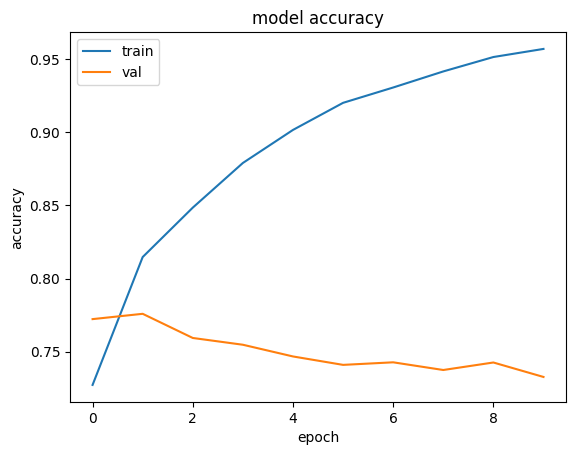

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

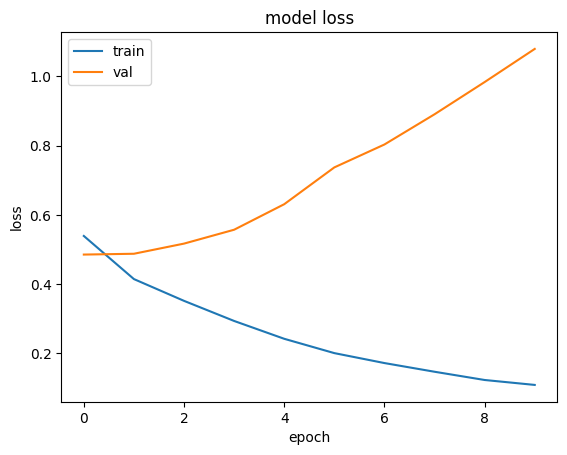

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pre = model.predict(test_pad)

312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


prin

In [ ]:
print(classification_report(y_test, y_pre.round()))
print(accuracy_score(y_test, y_pre.round()))
print(precision_score(y_test, y_pre.round()))
print(recall_score(y_test, y_pre.round()))
print(f1_score(y_test, y_pre.round()))


              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5006
           1       0.76      0.69      0.72      4978

    accuracy                           0.73      9984
   macro avg       0.74      0.73      0.73      9984
weighted avg       0.74      0.73      0.73      9984

0.7344751602564102
0.7562210966747412
0.6898352752109281
0.7215043597016493
